In [1]:
import pandas, numpy

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [3]:
input_file = 'Seahorse_on_HLMVEC_Dec_2nd.xlsx'

palette = ['black', 'tab:orage', 'tab:red']

# read information

In [4]:
df = pandas.read_excel(input_file, sheet_name='Rate')
df

,Measurement,Well,Group,Time,OCR,ECAR,PER
0,1,A01,Background,1.309773,0.0,0.0,0
1,1,A02,Background,1.309773,0.0,0.0,0
2,1,A03,Background,1.309773,0.0,0.0,0
3,1,A04,Background,1.309773,0.0,0.0,0
4,1,A05,Background,1.309773,0.0,0.0,0
...,...,...,...,...,...,...,...
1435,15,H08,Background,91.908998,0.0,0.0,0
1436,15,H09,Background,91.908998,0.0,0.0,0
1437,15,H10,Background,91.908998,0.0,0.0,0
1438,15,H11,Background,91.908998,0.0,0.0,0


# work with ocr at four hours

In [5]:
df['Group'].unique()

array(['Background', 'Control', '24 HRS - Adreanline:Noradrenaline 5 uM',
       '24 HRS - Adreanline:Noradrenaline 0.5 uM', '24 HRS - Tnfa',
       '4 HRS - Adreanline:Noradrenaline 5 uM',
       '4 HRS - Adreanline:Noradrenaline 0.5 uM', '4 HRS - Tnfa'],
      dtype=object)

In [19]:
dff

,B02,B11,C02,C11,D02,D11,E02,E11,F02,F11,G02,G11
Time,,,,,,,,,,,,
1.309773,51.627488,47.156966,51.678791,45.879317,56.009880,41.714486,48.163261,57.264143,52.930929,33.115764,47.457757,43.688636
7.760609,51.309295,43.930407,51.330673,45.344422,51.202418,40.237918,46.541353,56.234145,49.720443,28.674787,43.622774,43.223338
14.209145,47.598807,42.738089,50.981620,45.279259,49.082009,40.436967,45.553076,57.523330,48.048630,26.838370,42.623786,43.769216
20.659538,47.576919,42.950595,51.316367,44.678882,49.255140,42.821663,45.467148,59.361554,47.693609,25.584742,42.352136,46.323981
27.106986,46.721095,42.930317,50.853200,44.728095,48.678209,40.355370,44.760991,60.379094,47.152758,25.935924,41.801474,44.510196
33.557364,45.497540,42.199050,50.302861,44.235412,47.955919,39.182478,44.696197,59.409687,46.950742,23.881929,38.173562,43.528879
40.107075,34.560431,29.687735,36.679772,32.981859,35.460322,27.370268,29.380773,40.661352,34.451363,23.108914,30.406385,32.558922
46.558269,33.426177,27.828544,35.455505,32.386735,42.121641,26.893839,29.907134,45.749251,32.147857,22.689417,29.465747,31.251861
53.010885,32.829160,27.916189,36.576143,32.260703,38.894423,25.432745,28.487873,46.792808,31.660478,22.041334,28.235983,30.285278


Control
	 before normalization


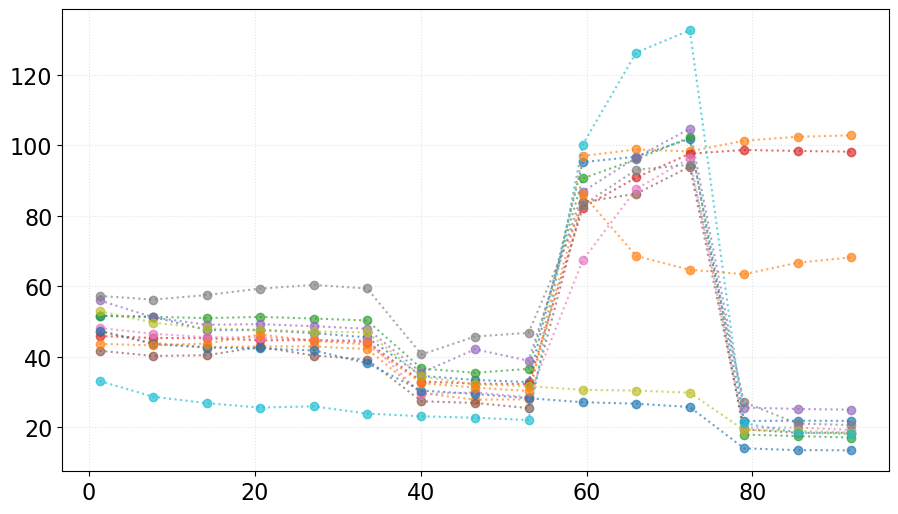

	 after normalization


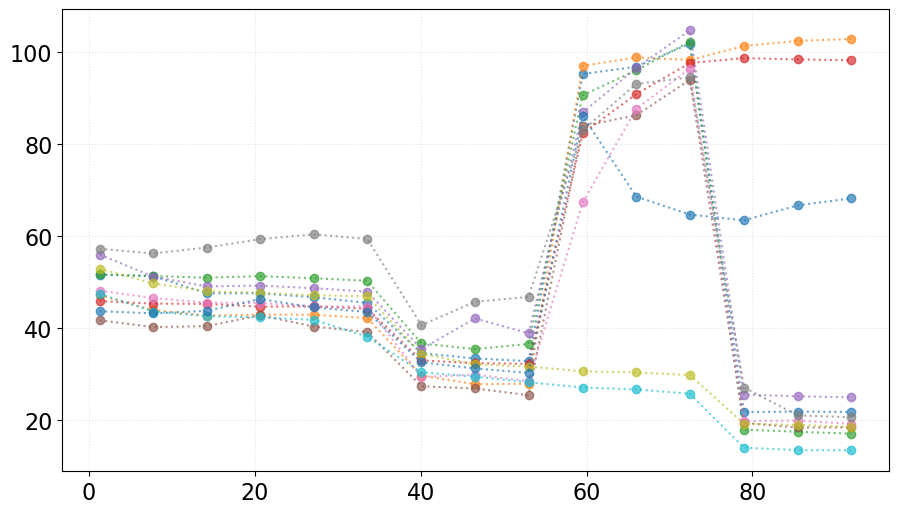

,B02,B11,C02,C11,D02,D11,E02,E11,F02,G02,G11
Time,,,,,,,,,,,
1.309773,51.627488,47.156966,51.678791,45.879317,56.009880,41.714486,48.163261,57.264143,52.930929,47.457757,43.688636
7.760609,51.309295,43.930407,51.330673,45.344422,51.202418,40.237918,46.541353,56.234145,49.720443,43.622774,43.223338
14.209145,47.598807,42.738089,50.981620,45.279259,49.082009,40.436967,45.553076,57.523330,48.048630,42.623786,43.769216
20.659538,47.576919,42.950595,51.316367,44.678882,49.255140,42.821663,45.467148,59.361554,47.693609,42.352136,46.323981
27.106986,46.721095,42.930317,50.853200,44.728095,48.678209,40.355370,44.760991,60.379094,47.152758,41.801474,44.510196
33.557364,45.497540,42.199050,50.302861,44.235412,47.955919,39.182478,44.696197,59.409687,46.950742,38.173562,43.528879
40.107075,34.560431,29.687735,36.679772,32.981859,35.460322,27.370268,29.380773,40.661352,34.451363,30.406385,32.558922
46.558269,33.426177,27.828544,35.455505,32.386735,42.121641,26.893839,29.907134,45.749251,32.147857,29.465747,31.251861
53.010885,32.829160,27.916189,36.576143,32.260703,38.894423,25.432745,28.487873,46.792808,31.660478,28.235983,30.285278


In [20]:
working_groups = ['Control', '4 HRS - Adreanline:Noradrenaline 0.5 uM', '4 HRS - Adreanline:Noradrenaline 5 uM']
excluded_wells = {}
excluded_wells['Control'] = ['F11']

for condition in working_groups[:1]:
    
    print(condition)
    sub = df[df['Group'] == condition]

    # generate dataframe for this trajectory
    dff = pandas.DataFrame()
    wells = sub['Well'].unique()
    for well in wells:
        trajectory = sub[sub['Well'] == well][['Time', 'OCR']]
        trajectory.set_index('Time', inplace=True)
        trajectory.rename(columns={'OCR': well}, inplace=True)
        dff[well] = trajectory[well]

    # plot original data
    print('\t before normalization')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

    # exclude samples that failed technically
    dff.drop(excluded_wells[condition], axis='columns', inplace=True)

    # plot after excluding technical failures
    print('\t after normalization')
    matplotlib.pyplot.plot(dff.index, dff, 'o:', alpha=2/3)
    matplotlib.pyplot.grid(ls=':', alpha=1/3)
    matplotlib.pyplot.show()

dff

In [7]:
condition = '4 HRS - Adreanline:Noradrenaline 5 uM'
sub = df[df['Group'] == condition]

In [8]:
sub[sub['Well'] == 'E03']

,Measurement,Well,Group,Time,OCR,ECAR,PER
50,1,E03,4 HRS - Adreanline:Noradrenaline 5 uM,1.309773,61.078403,7.336733,0
146,2,E03,4 HRS - Adreanline:Noradrenaline 5 uM,7.760609,58.478463,6.890651,0
242,3,E03,4 HRS - Adreanline:Noradrenaline 5 uM,14.209145,57.653785,6.999504,0
338,4,E03,4 HRS - Adreanline:Noradrenaline 5 uM,20.659538,57.844839,7.073279,0
434,5,E03,4 HRS - Adreanline:Noradrenaline 5 uM,27.106986,57.081481,7.535313,0
530,6,E03,4 HRS - Adreanline:Noradrenaline 5 uM,33.557364,56.988483,7.142354,0
626,7,E03,4 HRS - Adreanline:Noradrenaline 5 uM,40.107075,32.857983,10.969268,0
722,8,E03,4 HRS - Adreanline:Noradrenaline 5 uM,46.558269,30.744596,10.715743,0
818,9,E03,4 HRS - Adreanline:Noradrenaline 5 uM,53.010885,29.709520,10.165988,0
914,10,E03,4 HRS - Adreanline:Noradrenaline 5 uM,59.546650,128.403837,17.781969,0


In [9]:
trajectory

NameError: name 'trajectory' is not defined

In [ ]:
dff = pandas.DataFrame()
wells = sub['Well'].unique()
for well in wells:
    print(well)
    trajectory = sub[sub['Well'] == well][['Time', 'OCR']]
    trajectory.set_index('Time', inplace=True)
    trajectory.rename(columns={'OCR': well}, inplace=True)
    dff[well]=trajectory[well]
dff

In [ ]:
matplotlib.pyplot.plot(dff.index, dff, 'o-')
matplotlib.pyplot.show()


In [ ]:
relative_mu = dff.mean()/dff.mean().mean()
print(relative_mu)
normalized_green = dff/relative_mu


In [ ]:
matplotlib.pyplot.plot(dff.index, normalized_green, 'o-')
matplotlib.pyplot.show()


In [ ]:
wells = sub['Well'].unique()

full = []
for well in wells:
    welldf = sub[sub['Well'] == well]
    time = welldf['Time']
    ocr = welldf['OCR']

    # plot
    matplotlib.pyplot.plot(time, ocr)

    # get values for normalization
    x = ocr.to_list()
    full.append(x)

matplotlib.pyplot.show()

# get values for normalization
matrix = numpy.array(full)
trajectories_means = matrix.mean(axis=1)
reference_value = trajectories_means.mean()
bias = trajectories_means / reference_value
correction = 1/bias

print(matrix)
print(trajectories_means)
print(reference_value)
print(bias)

normalized = (matrix.T * correction).T
print(normalized)

matplotlib.pyplot.plot(time, normalized.T)
matplotlib.pyplot.show()
